# Exploratory Data Analysis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('whitegrid')

## Load Data

In [11]:
df = pd.read_csv('../../1_data_collection/data/cleaned/girls_survey_clean.csv')
print(f"n = {len(df)}")
df.head()

n = 102


,id,age_group,displacement_duration,school,in_program,who_cheerful,who_calm,who_active,who_rested,who_interested,...,people_understand_me,social_index,conf_self,conf_handle,conf_proud,confidence_index,fb_happy,fb_forget_worries,fb_feel_stronger,fb_recommend
0,1,13-15,gt_3y,yes,yes,4,4,5,4,4,...,4,4.666667,4,4,5,4.333333,5.0,5.0,4.0,definitely
1,2,16-18,gt_3y,yes,yes,5,4,5,3,4,...,4,4.333333,4,4,4,4.000000,5.0,4.0,5.0,definitely
2,3,16-18,gt_3y,yes,yes,4,3,4,3,4,...,4,4.000000,4,3,4,3.666667,4.0,4.0,4.0,probably
3,4,13-15,gt_3y,yes,yes,5,5,5,4,5,...,5,5.000000,5,5,5,5.000000,5.0,5.0,5.0,definitely
4,5,13-15,gt_3y,yes,no,2,2,2,2,2,...,2,2.000000,2,2,2,2.000000,NaN,NaN,NaN,NaN


## Sample Characteristics

In [12]:
print("Program participation:")
print(df['in_program'].value_counts())
print(f"\nParticipation rate: {(df['in_program']=='yes').sum()/len(df)*100:.1f}%")

Program participation:
in_program
yes    79
no     23
Name: count, dtype: int64

Participation rate: 77.5%


In [13]:
print("Age distribution:")
print(df.groupby(['in_program', 'age_group']).size().unstack(fill_value=0))

Age distribution:
age_group   13-15  16-18  19-22
in_program                     
no              5     11      7
yes            40     26     13


In [14]:
print("Displacement duration:")
print(df.groupby(['in_program', 'displacement_duration']).size().unstack(fill_value=0))

Displacement duration:
displacement_duration  2_3y  gt_3y
in_program                        
no                        0     23
yes                       2     77


In [15]:
print("School enrollment:")
print(df.groupby(['in_program', 'school']).size().unstack(fill_value=0))

School enrollment:
school      no  yes
in_program         
no           0   23
yes          6   73


## Descriptive Statistics

In [7]:
outcome_vars = ['who5_score', 'social_index', 'confidence_index']

print("Participants:")
print(df[df['in_program']=='yes'][outcome_vars].describe())

print("\nNon-participants:")
print(df[df['in_program']=='no'][outcome_vars].describe())

Participants:
       who5_score  social_index  confidence_index
count   79.000000     79.000000         79.000000
mean    82.126582      4.312236          4.164557
std     10.790983      0.521180          0.605938
min     60.000000      3.000000          3.000000
25%     72.000000      4.000000          3.666667
50%     84.000000      4.333333          4.000000
75%     90.000000      4.833333          4.833333
max    100.000000      5.000000          5.000000

Non-participants:
       who5_score  social_index  confidence_index
count   23.000000     23.000000         23.000000
mean    40.695652      1.985507          2.072464
std      3.746936      0.158218          0.140580
min     36.000000      1.666667          2.000000
25%     38.000000      2.000000          2.000000
50%     40.000000      2.000000          2.000000
75%     44.000000      2.000000          2.000000
max     48.000000      2.333333          2.333333


## Distribution Analysis

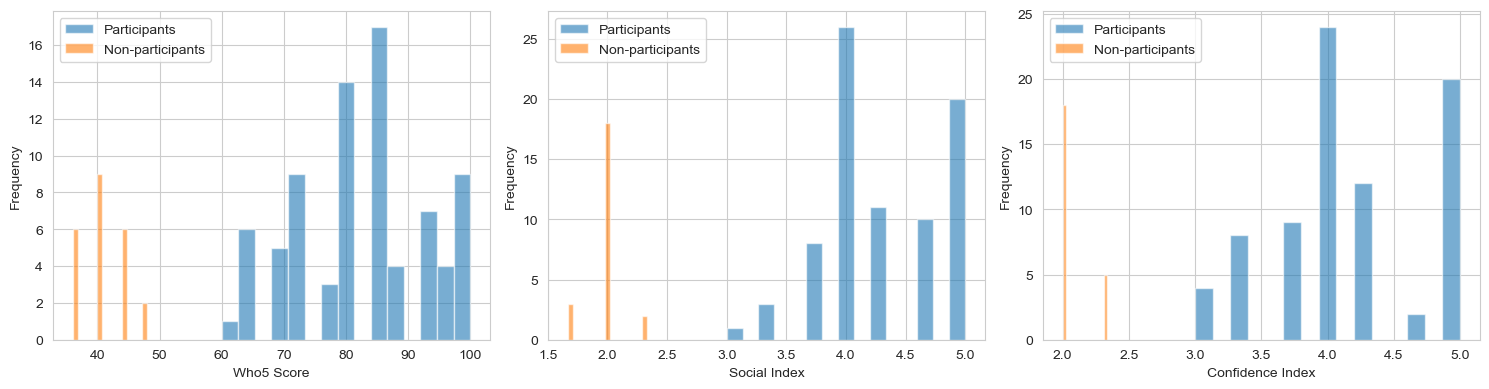

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, var in enumerate(outcome_vars):
    ax = axes[idx]
    participants = df[df['in_program']=='yes'][var]
    non_participants = df[df['in_program']=='no'][var]
    
    ax.hist(participants, alpha=0.6, label='Participants', bins=15)
    ax.hist(non_participants, alpha=0.6, label='Non-participants', bins=15)
    ax.set_xlabel(var.replace('_', ' ').title())
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

## Normality Tests

In [9]:
for var in outcome_vars:
    print(f"\n{var}:")
    
    participants = df[df['in_program']=='yes'][var].dropna()
    non_participants = df[df['in_program']=='no'][var].dropna()
    
    stat_p, p_p = stats.shapiro(participants)
    stat_np, p_np = stats.shapiro(non_participants)
    
    print(f"  Participants: W={stat_p:.4f}, p={p_p:.4f}")
    print(f"  Non-participants: W={stat_np:.4f}, p={p_np:.4f}")


who5_score:
  Participants: W=0.9520, p=0.0048
  Non-participants: W=0.8748, p=0.0079

social_index:
  Participants: W=0.8978, p=0.0000
  Non-participants: W=0.6485, p=0.0000

confidence_index:
  Participants: W=0.9026, p=0.0000
  Non-participants: W=0.5122, p=0.0000
